<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlibtutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境 スタイル

Jupyter の matplotlib で スタイルがあるとか。  



In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
data = np.random.randn(50)
print (data)

[ 3.38369297 -0.51924882  0.26004998  1.01024618  0.36869213 -1.50334531
 -1.00087263 -1.42316585 -0.55735486 -0.17418412  1.34579301  1.28771882
 -1.71772378 -1.17701751 -0.02657026 -0.17104925 -0.26217551 -0.11911951
  0.7776927   0.06256227  0.63757695  0.08297054 -0.73991718  0.67306118
 -0.48712785 -1.38590534  0.97348438 -0.81380093  0.95382845  0.09697341
  1.88676975  0.92275682  0.46043019 -1.17753467  0.1404828  -0.14675887
 -0.77168969  0.61056056  1.56475989 -0.03466308  1.27477931 -1.63169519
  0.16974698  0.56626215 -0.01191769 -0.4135893  -0.10464666 -1.94139307
 -0.34436785  0.02564467]


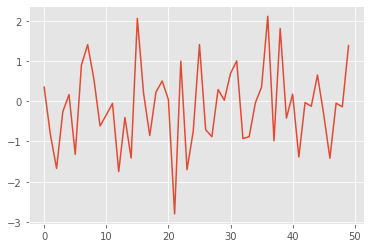

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
data = np.random.randn(50)
plt.plot(data)
plt.show()

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Solarize_Light2, _classic_test_patch, bmh, classic, dark_background,   
fast, fivethirtyeight, ggplot, grayscale, seaborn, seaborn-bright,   
seaborn-colorblind, seaborn-dark, seaborn-dark-palette, seaborn-darkgrid,   
seaborn-deep, seaborn-muted, seaborn-notebookm, seaborn-paperm, seaborn-pastelm,   
seaborn-posterm, seaborn-talk, seaborn-ticks, seaborn-white,   
seaborn-whitegrid, tableau-colorblind10  

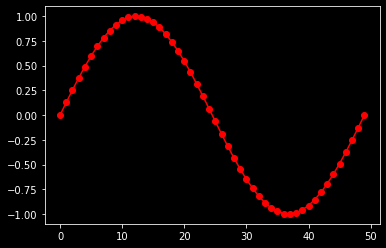

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

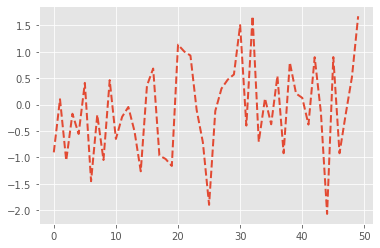

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

data = np.random.randn(50)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(data)
plt.show()

Note, that in order to change the usual `~.Axes.plot` color you have to
change the *prop_cycle* property of *axes*:



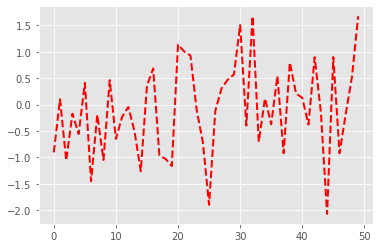

In [9]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red
plt.show()

Matplotlib also provides a couple of convenience functions for modifying rc
settings. `matplotlib.rc` can be used to modify multiple
settings in a single group at once, using keyword arguments:



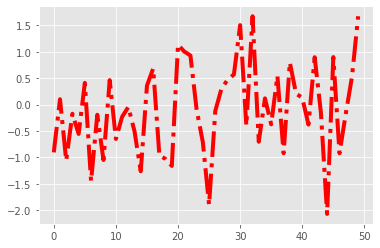

In [10]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

`matplotlib.rcdefaults` will restore the standard Matplotlib
default settings.

There is some degree of validation when setting the values of rcParams, see
:mod:`matplotlib.rcsetup` for details.


The :file:`matplotlibrc` file
-----------------------------

Matplotlib uses :file:`matplotlibrc` configuration files to customize all
kinds of properties, which we call 'rc settings' or 'rc parameters'. You can
control the defaults of almost every property in Matplotlib: figure size and
DPI, line width, color and style, axes, axis and grid properties, text and
font properties and so on. When a URL or path is not specified with a call to
``style.use('<path>/<style-name>.mplstyle')``, Matplotlib looks for
:file:`matplotlibrc` in four locations, in the following order:

1. :file:`matplotlibrc` in the current working directory, usually used for
   specific customizations that you do not want to apply elsewhere.

2. :file:`$MATPLOTLIBRC` if it is a file, else
   :file:`$MATPLOTLIBRC/matplotlibrc`.

3. It next looks in a user-specific place, depending on your platform:

   - On Linux and FreeBSD, it looks in
     :file:`.config/matplotlib/matplotlibrc` (or
     :file:`$XDG_CONFIG_HOME/matplotlib/matplotlibrc`) if you've customized
     your environment.

   - On other platforms, it looks in :file:`.matplotlib/matplotlibrc`.

   See `locating-matplotlib-config-dir`.

4. :file:`{INSTALL}/matplotlib/mpl-data/matplotlibrc`, where
   :file:`{INSTALL}` is something like
   :file:`/usr/lib/python3.7/site-packages` on Linux, and maybe
   :file:`C:\\Python37\\Lib\\site-packages` on Windows. Every time you
   install matplotlib, this file will be overwritten, so if you want
   your customizations to be saved, please move this file to your
   user-specific matplotlib directory.

Once a :file:`matplotlibrc` file has been found, it will *not* search any of
the other paths.

To display where the currently active :file:`matplotlibrc` file was
loaded from, one can do the following::

  >>> import matplotlib
  >>> matplotlib.matplotlib_fname()
  '/home/foo/.config/matplotlib/matplotlibrc'

See below for a sample `matplotlibrc file<matplotlibrc-sample>`.


A sample matplotlibrc file
~~~~~~~~~~~~~~~~~~~~~~~~~~

.. literalinclude:: ../../../matplotlibrc.template



